## HW3. Advection Equation

In [1]:
# 필요한 library import
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 변수 설정
dt = 1/72
dx = 1/36
U = 0.2
x = np.arange(0, 1, dx)
t = np.arange(0, 5, dt)

In [3]:
# 프사이 함수 정의
def psi(x0):
    if x0 > 0:
        x1 = x0-int(x0)
    else:
        x1 = 1+x0-int(x0)
    if 39/54 <= x1 <= 51/54:
        return (9**4)*((x1-(5/6))**2-(1/9)**2)**2
    else:
        return 0

In [4]:
# Leapfrog time-differencing 함수 정의
def Sol1(psi1, psi2, a):
    psi_1 = []
    for i in range(len(psi2)-2):
        psi_1.append(psi1[i]-U*(dt/dx)*(psi2[i+1]-psi2[i-1]))
    psi_1.append(psi1[-2]-U*(dt/dx)*(psi2[-1]-psi2[len(psi2)-3]))
    psi_1.append(psi1[-1]-U*(dt/dx)*(psi2[0]-psi2[len(psi2)-2]))
    a.append(psi_1)

In [5]:
# 2nd order spatial-differencing 함수 정의
def Sol2(psi3, a):
    psi_2 = []
    for i in range(len(psi3)):
        psi_2.append(psi3[i]-U*(dt/dx)*(psi3[i]-psi3[i-1]))
    a.append(psi_2)

In [6]:
# forward time/spatial-differencing
psi_3 = []
for i in range(len(x)):
     psi_3.append(psi(x[i]))

In [7]:
# Leapfrog time-differencing & 2nd order spatial-differencing
def a2():
    a = []
    a0 = []
    for i in range(len(x)):
        a0.append(psi(x[i]))
    a.append(a0)
    return a

def a1():
    a = a2()
    Sol2(a[0], a)
    return a

a3 = a1()
for i in range(len(t)-1):
    Sol1(a3[i], a3[i+1],a3)

a4 = a2()
for i in range(len(t)):
    Sol2(a4[i],a4)

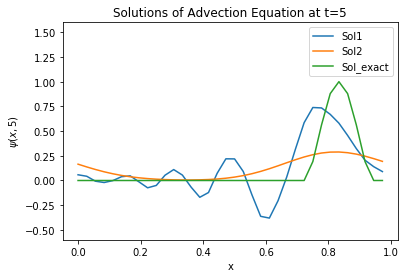

In [8]:
# 그래프 그리기
plt.figure()

plt.plot(x, a3[-1], label='Sol1')
plt.plot(x, a4[-1], label='Sol2')
plt.plot(x, psi_3, label='Sol_exact')

plt.ylim(-0.6, 1.6)

plt.title('Solutions of Advection Equation at t=5')
plt.xlabel('x')
plt.ylabel(r'$\psi(x,5)$')

plt.legend()

plt.show()